In [1]:
from PIL import Image
import numpy as np
from queue import Queue

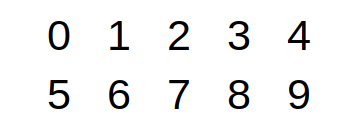

In [2]:
file_name = "input/nums.jpg"

input_image = Image.open(open(file_name, 'rb'))
input_image

In [3]:
# url = 'http://localhost:5000/blackwhite'
# files = {'media': open('bebek.jpg', 'rb')}
# response = requests.post(url, files=files)
# response.content

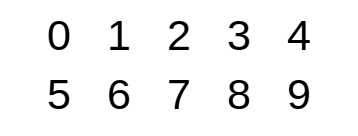

In [4]:
pixel_img = np.array(input_image)
pixel_gray = np.zeros(pixel_img.shape[0:2], pixel_img.dtype)
for i, row in enumerate(pixel_img):
    for j, pix in enumerate(row):
        pixel_gray[i][j] = np.uint8(pix[:3].mean())
        
Image.fromarray(pixel_gray)

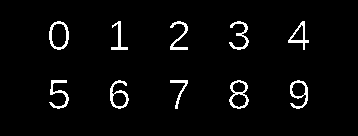

In [5]:
threshold = 31

pixel_bw = np.zeros(pixel_gray.shape[0:2], pixel_gray.dtype)
for i, row in enumerate(pixel_gray):
    for j, pix in enumerate(row):
        if pixel_gray[i][j] < threshold:
            pixel_bw[i][j] = 255
        else:
            pixel_bw[i][j] = 0

Image.fromarray(pixel_bw)

In [6]:
pixel_visited = np.zeros(pixel_bw.shape[0:2], bool)

def antiflood(i, j, matrix_bw, matrix_visited):
    q = Queue()
    q.put((i,j))
    matrix_visited[i][j] = True
    cluster_size = 0
    upper_left_point = (i,j)
    lower_right_point = (i,j)
    while not q.empty():
        current = q.get()
        if current[0] > lower_right_point[0]:
            lower_right_point = (current[0], lower_right_point[1])
        if current[1] < upper_left_point[1]:
            upper_left_point = (upper_left_point[0], current[1])
        elif current[1] > lower_right_point[1]:
            lower_right_point = (lower_right_point[0], current[1])
        cluster_size += 1
        if (current[0]-1 >= 0) and matrix_bw[current[0]-1][current[1]] == 255 and not matrix_visited[current[0]-1][current[1]]:
            q.put((current[0]-1, current[1]))
            matrix_visited[current[0]-1][current[1]] = True
        if (current[0]+1 < pixel_visited.shape[0]) and matrix_bw[current[0]+1][current[1]] == 255 and not matrix_visited[current[0]+1][current[1]]:
            q.put((current[0]+1, current[1]))
            matrix_visited[current[0]+1][current[1]] = True
        if (current[1]-1 >= 0) and matrix_bw[current[0]][current[1]-1] == 255 and not matrix_visited[current[0]][current[1]-1]:
            q.put((current[0], current[1]-1))
            matrix_visited[current[0]][current[1]-1] = True
        if (current[1]+1 < pixel_visited.shape[1]) and matrix_bw[current[0]][current[1]+1] == 255 and not matrix_visited[current[0]][current[1]+1]:
            q.put((current[0], current[1]+1))
            matrix_visited[current[0]][current[1]+1] = True
    return matrix_visited, cluster_size, upper_left_point, lower_right_point

size_threshold = 64
cluster_pivots = []
for i, row in enumerate(pixel_bw):
    for j, pix in enumerate(row):
        if pix == 255 and not pixel_visited[i][j]:
            pixel_visited, cluster_size, upper_left_point, lower_right_point = antiflood(i, j, pixel_bw, pixel_visited)
            if cluster_size > size_threshold:
                cluster_pivots.append({'pivot' : (i,j), 'size' : cluster_size, 'ul' : upper_left_point, 'lr' : lower_right_point})
print(cluster_pivots)

[{'pivot': (21, 57), 'size': 191, 'ul': (21, 49), 'lr': (49, 68)}, {'pivot': (21, 118), 'size': 143, 'ul': (21, 111), 'lr': (49, 127)}, {'pivot': (21, 177), 'size': 170, 'ul': (21, 170), 'lr': (49, 187)}, {'pivot': (21, 237), 'size': 178, 'ul': (21, 229), 'lr': (49, 248)}, {'pivot': (21, 302), 'size': 161, 'ul': (21, 288), 'lr': (49, 308)}, {'pivot': (80, 51), 'size': 193, 'ul': (80, 49), 'lr': (108, 68)}, {'pivot': (80, 118), 'size': 193, 'ul': (80, 110), 'lr': (108, 128)}, {'pivot': (80, 170), 'size': 124, 'ul': (80, 170), 'lr': (108, 187)}, {'pivot': (80, 237), 'size': 206, 'ul': (80, 229), 'lr': (108, 248)}, {'pivot': (80, 297), 'size': 190, 'ul': (80, 290), 'lr': (108, 307)}]


In [7]:
"""
Directions:

701
6x2
543

"""

for i, pivot in enumerate(cluster_pivots):
    direction_count = np.zeros(8, dtype='uint32')
    current_direction = 0
    direction_count[0] += 1
    current_pivot = pivot['pivot']
    start = False
    while not start or not (current_pivot[0] == pivot['pivot'][0] and current_pivot[1] == pivot['pivot'][1]):
        start = True
        if current_direction == 0:
            if pixel_bw[current_pivot[0]-1][current_pivot[1]+1] == 255:
                current_pivot = (current_pivot[0]-1, current_pivot[1]+1)
                current_direction = 6
                direction_count[6] += 1
                direction_count[7] += 1
            elif pixel_bw[current_pivot[0]][current_pivot[1]+1] == 255:
                current_pivot = (current_pivot[0], current_pivot[1]+1)
                direction_count[0] += 1
            else:
                current_direction = 2
                direction_count[1] += 1
                direction_count[2] += 1
        elif current_direction == 2:
            if pixel_bw[current_pivot[0]+1][current_pivot[1]+1] == 255:
                current_pivot = (current_pivot[0]+1, current_pivot[1]+1)
                current_direction = 0
                direction_count[0] += 1
                direction_count[1] += 1
            elif pixel_bw[current_pivot[0]+1][current_pivot[1]] == 255:
                current_pivot = (current_pivot[0]+1, current_pivot[1])
                direction_count[2] += 1
            else:
                current_direction = 4
                direction_count[3] += 1
                direction_count[4] += 1
        elif current_direction == 4:
            if pixel_bw[current_pivot[0]+1][current_pivot[1]-1] == 255:
                current_pivot = (current_pivot[0]+1, current_pivot[1]-1)
                current_direction = 2
                direction_count[2] += 1
                direction_count[3] += 1
            elif pixel_bw[current_pivot[0]][current_pivot[1]-1] == 255:
                current_pivot = (current_pivot[0], current_pivot[1]-1)
                direction_count[4] += 1
            else:
                current_direction = 6
                direction_count[5] += 1
                direction_count[6] += 1
        else:
            if pixel_bw[current_pivot[0]-1][current_pivot[1]-1] == 255:
                current_pivot = (current_pivot[0]-1, current_pivot[1]-1)
                current_direction = 4
                direction_count[4] += 1
                direction_count[5] += 1
            elif pixel_bw[current_pivot[0]-1][current_pivot[1]] == 255:
                current_pivot = (current_pivot[0]-1, current_pivot[1])
                direction_count[6] += 1
            else:
                current_direction = 0
                direction_count[7] += 1
                direction_count[0] += 1
    cluster_pivots[i]['chains'] = direction_count

print(cluster_pivots)
    

[{'pivot': (21, 57), 'size': 191, 'ul': (21, 49), 'lr': (49, 68), 'chains': array([20, 13, 29, 13, 20, 13, 29, 12], dtype=uint32)}, {'pivot': (21, 118), 'size': 143, 'ul': (21, 111), 'lr': (49, 127), 'chains': array([23,  3, 33,  9, 23,  3, 33, 10], dtype=uint32)}, {'pivot': (21, 177), 'size': 170, 'ul': (21, 170), 'lr': (49, 187), 'chains': array([48, 11, 33, 35, 48,  7, 33, 36], dtype=uint32)}, {'pivot': (21, 237), 'size': 178, 'ul': (21, 229), 'lr': (49, 248), 'chains': array([51, 27, 38, 25, 51, 25, 38, 22], dtype=uint32)}, {'pivot': (21, 302), 'size': 161, 'ul': (21, 288), 'lr': (49, 308), 'chains': array([21,  3, 29,  3, 21,  3, 29, 28], dtype=uint32)}, {'pivot': (80, 51), 'size': 193, 'ul': (80, 49), 'lr': (108, 68), 'chains': array([50, 21, 37, 19, 50, 19, 37, 14], dtype=uint32)}, {'pivot': (80, 118), 'size': 193, 'ul': (80, 110), 'lr': (108, 128), 'chains': array([34, 21, 36, 21, 34, 17, 36, 20], dtype=uint32)}, {'pivot': (80, 170), 'size': 124, 'ul': (80, 170), 'lr': (108, 18

In [8]:
for i, cluster in enumerate(cluster_pivots):
    print(cluster)

{'pivot': (21, 57), 'size': 191, 'ul': (21, 49), 'lr': (49, 68), 'chains': array([20, 13, 29, 13, 20, 13, 29, 12], dtype=uint32)}
{'pivot': (21, 118), 'size': 143, 'ul': (21, 111), 'lr': (49, 127), 'chains': array([23,  3, 33,  9, 23,  3, 33, 10], dtype=uint32)}
{'pivot': (21, 177), 'size': 170, 'ul': (21, 170), 'lr': (49, 187), 'chains': array([48, 11, 33, 35, 48,  7, 33, 36], dtype=uint32)}
{'pivot': (21, 237), 'size': 178, 'ul': (21, 229), 'lr': (49, 248), 'chains': array([51, 27, 38, 25, 51, 25, 38, 22], dtype=uint32)}
{'pivot': (21, 302), 'size': 161, 'ul': (21, 288), 'lr': (49, 308), 'chains': array([21,  3, 29,  3, 21,  3, 29, 28], dtype=uint32)}
{'pivot': (80, 51), 'size': 193, 'ul': (80, 49), 'lr': (108, 68), 'chains': array([50, 21, 37, 19, 50, 19, 37, 14], dtype=uint32)}
{'pivot': (80, 118), 'size': 193, 'ul': (80, 110), 'lr': (108, 128), 'chains': array([34, 21, 36, 21, 34, 17, 36, 20], dtype=uint32)}
{'pivot': (80, 170), 'size': 124, 'ul': (80, 170), 'lr': (108, 187), 'cha

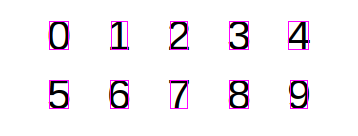

In [9]:
pixel_img_result = pixel_img.copy()

for i, cluster in enumerate(cluster_pivots):
    for j in range(cluster['ul'][0], cluster['lr'][0]+1):
        pixel_img_result[j][cluster['ul'][1]] = [255, 0, 255, 255]
        pixel_img_result[j][cluster['lr'][1]] = [255, 0, 255, 255]
    for j in range(cluster['ul'][1], cluster['lr'][1]+1):
        pixel_img_result[cluster['ul'][0]][j] = [255, 0, 255, 255]
        pixel_img_result[cluster['lr'][0]][j] = [255, 0, 255, 255]

Image.fromarray(pixel_img_result)